# DATA2 Figures

In [1]:
from utility import *

### Figure 2

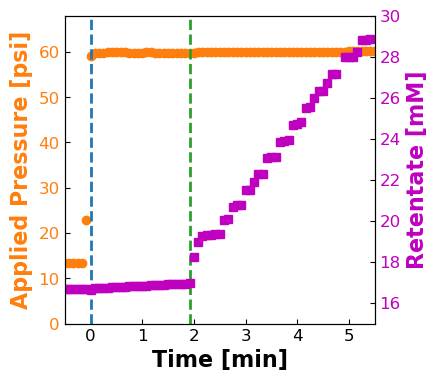

In [2]:
data_pd=pd.read_csv('data_library/NF270611.1_lag_pressure.csv',skiprows=[1])

COLOR_1 = "tab:orange"
COLOR_2 = "m"
fig, ax1 = plt.subplots(figsize=(4, 4))
ax2 = ax1.twinx()

ax1.plot((data_pd.Time-185)/60, data_pd.Pressure, 'o', color=COLOR_1, markersize=6)
ax2.plot((data_pd.Time-185)/60, data_pd.Concentration, 's', color=COLOR_2, markersize=6)
ax1.plot([0,0], [0,100], '--',color='tab:blue', lw=2)
ax1.plot([(300-185)/60,(300-185)/60], [0,100], '--',color='tab:green', lw=2)

ax1.set_xlabel("Time [min]", fontsize=16,fontweight='bold')
ax1.set_ylabel("Applied Pressure [psi]", color=COLOR_1, fontsize=16,fontweight='bold')
ax1.tick_params(axis="x", which='major', direction="in", labelsize=12)
ax1.tick_params(axis='x', which='minor', direction="in", labelsize=8)
ax1.tick_params(axis="y", labelcolor=COLOR_1,direction="in", labelsize=12)
ax1.set_xlim(-0.5, 5.5)
ax1.set_ylim(0, 68)

ax2.set_ylabel("Retentate [mM]", color=COLOR_2, fontsize=16,fontweight='bold')
ax2.tick_params(axis="y", labelcolor=COLOR_2,direction="in", labelsize=12)
ax2.set_ylim(15, 30)

fig_name = "pressure_change_lag.png"
fig.savefig(fig_name,dpi=600,bbox_inches='tight',transparent=True)

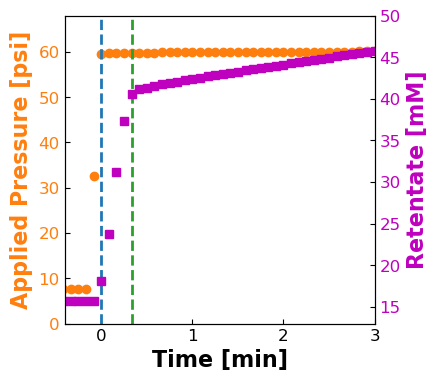

In [3]:
data_pd=pd.read_csv('data_library/NF270511.4_overflow_pressure.csv',skiprows=[1])

COLOR_1 = "tab:orange"
COLOR_2 = "m"
fig, ax1 = plt.subplots(figsize=(4, 4))
ax2 = ax1.twinx()

ax1.plot((data_pd.Time-130)/60, data_pd.Pressure, 'o', color=COLOR_1, markersize=6)
ax2.plot((data_pd.Time-130)/60, data_pd.Concentration, 's', color=COLOR_2, markersize=6)
ax1.plot([0,0], [0,100], '--',color='tab:blue', lw=2)
ax1.plot([(150-130)/60,(150-130)/60], [0,100], '--',color='tab:green', lw=2)

ax1.set_xlabel("Time [min]", fontsize=16,fontweight='bold')
ax1.set_ylabel("Applied Pressure [psi]", color=COLOR_1, fontsize=16,fontweight='bold')
ax1.tick_params(axis="x", which='major', direction="in", labelsize=12)
ax1.tick_params(axis='x', which='minor', direction="in", labelsize=8)
ax1.tick_params(axis="y", labelcolor=COLOR_1,direction="in", labelsize=12)
ax1.set_xlim(-0.4, 3)
ax1.set_ylim(0, 68)

ax2.set_ylabel("Retentate [mM]", color=COLOR_2, fontsize=16,fontweight='bold')
ax2.tick_params(axis="y", labelcolor=COLOR_2,direction="in", labelsize=12)
ax2.set_ylim(13, 50)

fig_name = "pressure_change_overflow.png"
fig.savefig(fig_name,dpi=600,bbox_inches='tight',transparent=True)

## Figure S1

In [4]:
def calib_curve_cond(calib_curve,z):
    '''
    Plot calibration curve for conductivity probe
    '''
    x = calib_curve.Conductivity.values
    y = calib_curve.Concentration.values

    fig = plt.figure(figsize=(4,4))
    plt.plot(x,y,'bo',markersize=8)

    # calculate the trendline
    #z = np.polyfit(x, y, 1)
    l = np.poly1d(z)
    correlation = np.corrcoef(x, y)[0,1]
    r_squared = correlation**2
    r2 = r2_score(y, l(x))

    plt.plot(x,l(x),'b:',linewidth=3,alpha=.7)

    eqn = 'y=%.5fx%.2f \n R$\mathbf{^{2}}$=%.4f'%(z[0],z[1],r2)
    plt.annotate(eqn, xy=(x[-5],y[-5]),  xycoords='data',
                 xytext=(-40, 60), weight='bold', textcoords='offset points',
                 size=12, ha='center', va="center",
                 bbox=dict(boxstyle="round", color = "b", alpha=0.1),);

    xlabelstr='Conductivity [$\mathbf{\mu}$S $\mathbf{\cdot}$ cm$\mathbf{^{-1}}$]'
    ylabelstr='Concentration [mM]'
    plt.xlabel(xlabelstr,fontsize=16,fontweight='bold')
    plt.ylabel(ylabelstr,fontsize=16,fontweight='bold')
    plt.xticks(fontsize=15,rotation=45)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.tick_params(direction="in",top=True, right=True)

    fig.savefig('calib_curve.png',dpi=300,bbox_inches='tight')

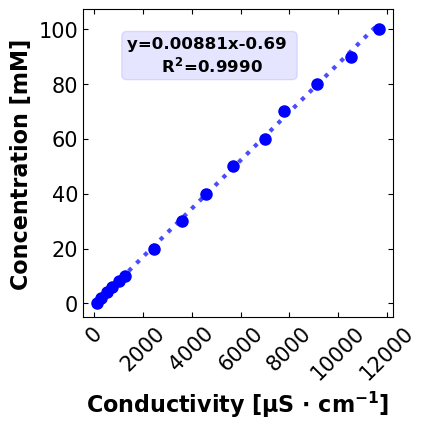

In [5]:
calib_curve_data = pd.read_csv('data_library/conductivity_calibration1.csv',header=0, skiprows=[1])
z=[0.008813,- 0.6949]
calib_curve_cond(calib_curve_data,z)

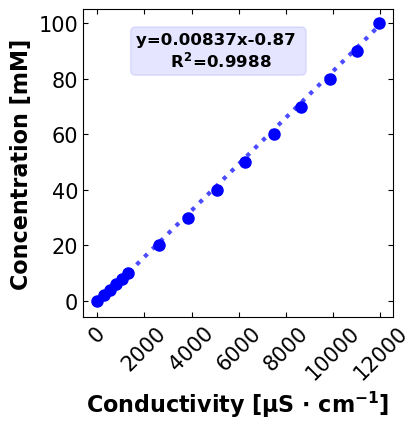

In [6]:
calib_curve_data = pd.read_csv('data_library/conductivity_calibration2.csv',header=0, skiprows=[1])
z=[0.008372,- 0.8735]
calib_curve_cond(calib_curve_data,z)

### Figure 3


Loading data file = data_library/data_stru-dataset270611.123.mat 

-0.8000000000000028


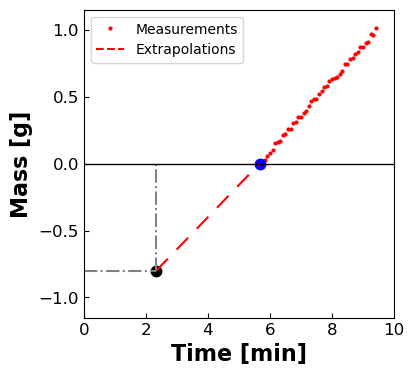

In [7]:
data_stru = loadmat('data_library/data_stru-dataset270611.123.mat')['data_stru']

t_delay = data_stru['data_raw'][0]['time'][0]
vial1 = data_stru['data_config']['n_v0']-1
t_start = data_stru['data_raw'][vial1]['time'][0]-t_delay

# plot mass data/prediction comparison
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1, 1, 1)

for i in range(3,4):
    plt.plot([(float(t))/60 for t in data_stru['data_raw'][i]['time']],
             data_stru['data_raw'][i]['mass'],'r.',markersize=4)
    f_m = interpolate.interp1d([(float(t))/60 for t in data_stru['data_raw'][i]['time']],data_stru['data_raw'][i]['mass'], kind='linear', fill_value='extrapolate')
print(f_m(140/60))
t_sim = np.linspace(140/60,(t_start+t_delay)/60,50)
plt.plot((t_start+t_delay)/60,0,'b.',markersize=15)
plt.plot(140/60,f_m(140/60),'k.',markersize=15)
plt.plot(t_sim,f_m(t_sim),'r--',dashes=(8, 6),lw=1.5)
plt.plot(np.linspace(140/60,140/60,50),f_m(t_sim),'-.',lw=1.5,color='gray')
plt.plot([0,t_sim[0]],[f_m(t_sim[0])]*2,'-.',lw=1.5,color='gray')
# ghost point for legend
plt.plot([],[],'r.',markersize=4,label='Measurements')
plt.plot([],[],'r--',lw=1.5,label='Extrapolations')

plt.xlabel('Time [min]',fontsize=16,fontweight='bold')
plt.ylabel('Mass [g]',fontsize=16,fontweight='bold')
plt.xticks(fontsize=12)#,rotation=45
plt.yticks(fontsize=12)
plt.tick_params(direction="in")
plt.ylim(-1.15,1.15)
plt.xlim(0,10)
plt.axhline(color='black', lw=1)
plt.legend(fontsize=10,loc='best')
plt.show()

fname = 'mass_tc-dat'+str(data_stru['dataset'])
fig.savefig(fname+'.png',dpi=300,bbox_inches='tight')

### Figure 7, S8

In [8]:
#j = sim_data["time"] > 150
#new_data = sim_data.loc[j]
#new_data.head()


In [9]:
def model_convection(sim_data):
    # Pyomo model
    model = ConcreteModel()
    
    # Sets
    n = len(sim_data["Js"])
    model.i = RangeSet(sim_data.index[0]+1,sim_data.index[-1]+1)
    
    # Parameters
    model.J_w = Param(model.i, initialize=lambda model, i: sim_data["Jw"][i-1],mutable=True)
    model.J_s = Param(model.i, initialize=lambda model, i: sim_data["Js"][i-1],mutable=True)
    model.c_in = Param(model.i, initialize=lambda model, i: sim_data["cIn"][i-1],mutable=True)
    model.c_h = Param(model.i, initialize=lambda model, i: sim_data["cH"][i-1],mutable=True)
    
    # Variables
    model.Js = Var(model.i,initialize=lambda model, i: sim_data["Jw"][i-1])
    model.Kp = Var(model.i,initialize=1.0, bounds=(0.01,1.2))  # Initialize K to 1.0
    model.Kf = Var(model.i,initialize=1.0, bounds=(0.01,1.2))  # Initialize K to 1.0
    #model.k2 = Var(initialize=1.0)
    '''
    model.k1f = Var(initialize=1e-2)  
    model.k0f = Var(initialize=1, bounds=(0.001,2))  
    model.k1p = Var(initialize=1e-2)  
    model.k0p = Var(initialize=1, bounds=(0.001,2))  
    '''
    model.k1 = Var(initialize=1e-2)
    model.k0 = Var(initialize=1, bounds=(1e-4,2))

    model.D_l = Var(initialize=1e-4, within=NonNegativeReals, bounds=(1e-7,1e-4))  # Initialize D_l to 1.0 cm/s
    model.expPe = Var(initialize=1, within=Reals, bounds=(np.exp(1e-3),np.exp(1e3)))  # Initialize Pe to 1.0
    #model.D_l.fixed=True
    
    # model.expDL = Var(initialize=np.exp(1E-6), within=NonNegativeReals, bounds=(np.exp(1E-7),np.exp(1E-4)))  # Initialize D_l to 1.0 cm/s

    @model.Constraint(model.i)
    def partition_f(model, i):
        # return model.K[i]*1e3 == model.k1 * model.c_in[i] + model.k0*1e3 # Why is this 1e3 here? Is this a units thing?
        # AD: removed 1e3 to see what happens
        # return model.Kf[i] == model.k1f * model.c_in[i] + model.k0f
        return model.Kf[i] == model.k1 * model.c_in[i] + model.k0
        # return model.K[i] == 1
        # return Constraint.Skip

    @model.Constraint(model.i)
    def partition_p(model, i):
         # return model.Kp[i] == model.k1p * model.c_in[i] + model.k0p
         return model.Kp[i] == model.k1 * model.c_h[i] + model.k0

    @model.Constraint(model.i)
    def convection(model, i):
        # Trick from AD: exp(x/y) = exp(x) - exp(y)
        # This really improved convergence
        # return model.Js[i] * (exp(model.J_w[i]) - exp(model.D_l) - 1) == model.J_w[i] * (model.c_in[i]*model.Kf[i]*(exp(model.J_w[i]) - exp(model.D_l)) - model.Kp[i]*model.c_h[i])
        return model.Js[i] * (model.expPe - 1) == model.J_w[i] * (model.c_in[i]*model.Kf[i]*model.expPe - model.Kp[i]*model.c_h[i])
        

    # Objective: Minimize the sum of squared errors
    model.FirstStageCost = Expression(rule=0)    
    def SecondStageCost(model):
        return sum((model.Js[i] - model.J_s[i])**2*100 for i in model.i)
    model.SecondStageCost = Expression(rule=SecondStageCost)
    
    def total_cost_rule(model):
            return model.FirstStageCost + model.SecondStageCost
    model.Total_Cost_Objective = Objective(rule=total_cost_rule, sense=minimize)
    
    # Solver
    solver = SolverFactory('ipopt')  # Use 'ipopt' for nonlinear optimization
    solver.options["linear_solver"] = "ma97"
    solver.options["halt_on_ampl_error"] = "yes"
    solver.options["acceptable_tol"] = 1e-8
    results = solver.solve(model, tee=True)

    # Print the results
    '''
    print(f"Optimal k0p: {model.k0p.value}")
    print(f"Optimal k1p: {model.k1p.value}")
    print(f"Optimal k0f: {model.k0f.value}")
    print(f"Optimal k1f: {model.k1f.value}")
    '''
    print(f"Optimal k0: {model.k0.value}")
    print(f"Optimal k1: {model.k1.value}")
    # print(f"Optimal D_l: {model.D_l.value}")
    print(f"Optimal Pe: {np.log(model.expPe.value)}")

    return model

In [10]:
data_stru = loadmat('data_library/data_stru-dataset270611.123.mat')['data_stru']
fname = 'data_library/sim_data-dat'+str(data_stru['dataset'])       
sim_data=pd.read_csv(fname+".csv")

no_startup = sim_data.loc[sim_data["time"]>120]

no_startup.head()


Loading data file = data_library/data_stru-dataset270611.123.mat 



,time,cIn,cH,Jw,Js
640,120.06668,19.964627,10.870333,0.001048,0.012010
641,120.20000,19.974382,10.871707,0.001048,0.012022
642,120.33332,19.984124,10.873106,0.001048,0.012034
643,120.46668,19.993857,10.874531,0.001048,0.012045
644,120.60000,20.003576,10.875980,0.001048,0.012057


In [11]:
# model=model_convection(no_startup)
model = model_convection(sim_data)

WARNING (W1002): Setting Var 'expPe' to a numeric value `1` outside the bounds
(np.float64(1.0010005001667084), None).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002


/var/folders/qf/qwqntgcx2w77y56pbztd4nmh0000gq/T/ipykernel_38808/333539313.py:30: RuntimeWarning: overflow encountered in exp
  model.expPe = Var(initialize=1, within=Reals, bounds=(np.exp(1e-3),np.exp(1e3)))  # Initialize Pe to 1.0


Ipopt 3.13.2: linear_solver=ma97
halt_on_ampl_error=yes
acceptable_tol=1e-08


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran co

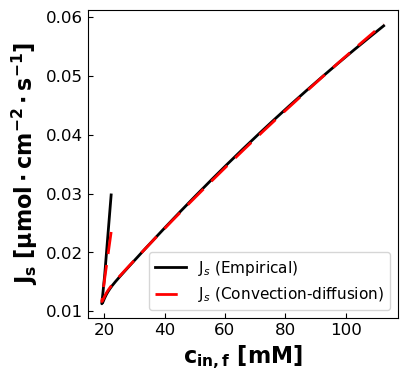

In [12]:
# Calculate predicted J_s values
predicted_J_s = [value(model.Js[i]) for i in model.i]

# my_data = no_startup
my_data = sim_data

# Visualization
fig = plt.figure(figsize=(4, 4))
plt.plot(my_data["cIn"], my_data["Js"], 'k-', label='J$_s$ (Empirical)', lw=2)
plt.plot(my_data["cIn"], predicted_J_s, 'r--', dashes=(8, 4),label='J$_s$ (Convection-diffusion)', lw=2)
plt.xlabel('c$\mathbf{_{in,f}}$ [mM]',fontsize=16,fontweight='bold')
plt.ylabel('J$\mathbf{_s\ [\mu mol \cdot cm^{-2} \cdot s^{-1}]}$',fontsize=16,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tick_params(direction="in")
plt.legend(fontsize=11,loc="best")
plt.show()

fname = 'Js_predict1'
fig.savefig(fname+'.png',dpi=300,bbox_inches='tight')

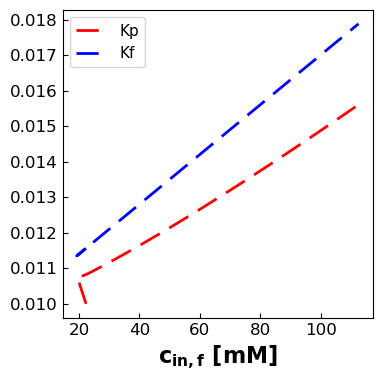

In [13]:
# Visualization

predicted_Kp = [value(model.Kp[i]) for i in model.i]
predicted_Kf = [value(model.Kf[i]) for i in model.i]

fig = plt.figure(figsize=(4, 4))
#plt.plot(my_data["cIn"], my_data["Js"], 'k-', label='J$_s$ (Empirical)', lw=2)
plt.plot(my_data["cIn"], predicted_Kp, 'r--', dashes=(8, 4),label='Kp', lw=2)
plt.plot(my_data["cIn"], predicted_Kf, 'b--', dashes=(8, 4),label='Kf', lw=2)
plt.xlabel('c$\mathbf{_{in,f}}$ [mM]',fontsize=16,fontweight='bold')
#plt.ylabel('J$\mathbf{_s\ [\mu mol \cdot cm^{-2} \cdot s^{-1}]}$',fontsize=16,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tick_params(direction="in")
plt.legend(fontsize=11,loc="best")
plt.show()

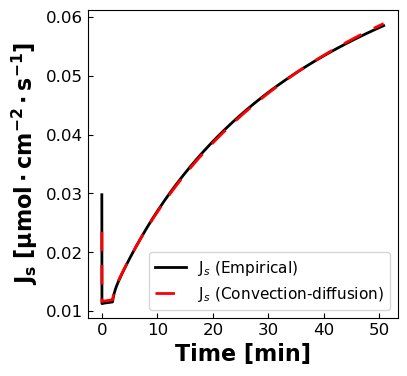

In [14]:
# Calculate predicted J_s values
predicted_J_s = [value(model.Js[i]) for i in model.i]

# Visualization
fig = plt.figure(figsize=(4, 4))
plt.plot(my_data["time"]/60, my_data["Js"], 'k-', label='J$_s$ (Empirical)', lw=2)
plt.plot(my_data["time"]/60, predicted_J_s, 'r--', dashes=(7, 5),label='J$_s$ (Convection-diffusion)', lw=2)
plt.xlabel('Time [min]',fontsize=16,fontweight='bold')
plt.ylabel('J$\mathbf{_s\ [\mu mol \cdot cm^{-2} \cdot s^{-1}]}$',fontsize=16,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tick_params(direction="in")
plt.legend(fontsize=11,loc="best")
plt.show()

fname = 'Js_predict'
fig.savefig(fname+'.png',dpi=300,bbox_inches='tight')

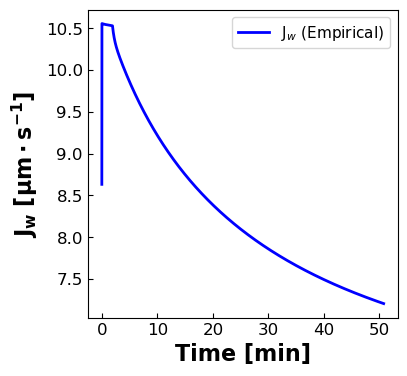

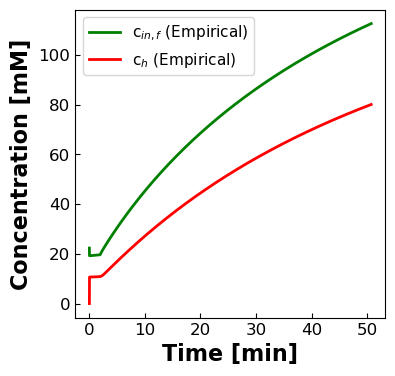

In [15]:
fig = plt.figure(figsize=(4, 4))
plt.plot(my_data["time"]/60, my_data["Jw"]*1e4, 'b-', label='J$_{w}$ (Empirical)', lw=2)

plt.xlabel('Time [min]',fontsize=16,fontweight='bold')
plt.ylabel('J$\mathbf{_w\ [\mu m \cdot s^{-1}]}$',fontsize=16,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tick_params(direction="in")
plt.legend(fontsize=11,loc="best")
plt.show()

fname = 'Jw_predict'
fig.savefig(fname+'.png',dpi=300,bbox_inches='tight')

fig = plt.figure(figsize=(4, 4))
plt.plot(my_data["time"]/60, my_data["cIn"], 'g-', label='c$_{in,f}$ (Empirical)', lw=2)
plt.plot(my_data["time"]/60, my_data["cH"], 'r-', label='c$_{h}$ (Empirical)', lw=2)

plt.xlabel('Time [min]',fontsize=16,fontweight='bold')
plt.ylabel('Concentration [mM]',fontsize=16,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tick_params(direction="in")
plt.legend(fontsize=11,loc="best")
plt.show()

fname = 'Js_predict0'
fig.savefig(fname+'.png',dpi=300,bbox_inches='tight')

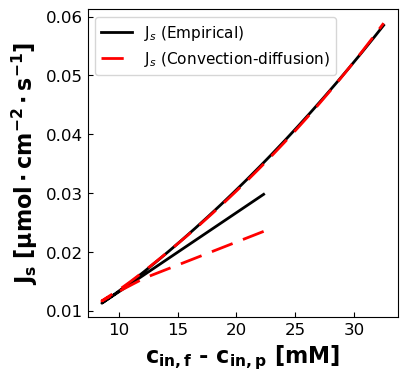

In [16]:
# Visualization
fig = plt.figure(figsize=(4, 4))
plt.plot(my_data["cIn"]-my_data["cH"], my_data["Js"], 'k-', label='J$_s$ (Empirical)', lw=2)
plt.plot(my_data["cIn"]-my_data["cH"], predicted_J_s, 'r--', dashes=(8, 4),label='J$_s$ (Convection-diffusion)', lw=2)
plt.xlabel('c$\mathbf{_{in,f}}$ - c$\mathbf{_{in,p}}$ [mM]',fontsize=16,fontweight='bold')
plt.ylabel('J$\mathbf{_s\ [\mu mol \cdot cm^{-2} \cdot s^{-1}]}$',fontsize=16,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tick_params(direction="in")
plt.legend(fontsize=11,loc="best")
plt.show()

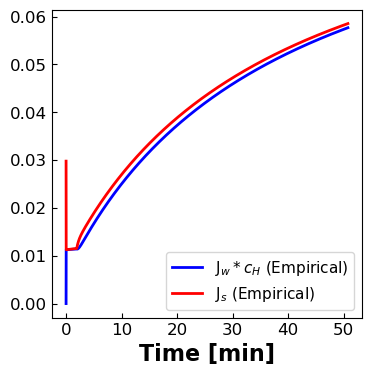

In [17]:
fig = plt.figure(figsize=(4, 4))
plt.plot(my_data["time"]/60, my_data["Jw"]*my_data["cH"], 'b-', label='J$_{w}*c_{H}$ (Empirical)', lw=2)
plt.plot(my_data["time"]/60, my_data["Js"], 'r-', label='J$_{s}$ (Empirical)', lw=2)

plt.xlabel('Time [min]',fontsize=16,fontweight='bold')
#plt.ylabel('J$\mathbf{_w\ [\mu m \cdot s^{-1}]}$',fontsize=16,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tick_params(direction="in")
plt.legend(fontsize=11,loc="best")
plt.show()

In [18]:
## TODO: Update because we are now calculating expPe instead of D_l

def calc_FIM(sim_data, theta=None, step=1e-6, formula='central'):
    if theta is None:
        model = model_convection(sim_data)
        theta = {"k0":model.k0.value,"k1":model.k1.value,"D_l":model.D_l.value}
    theta_p = copy.deepcopy(theta)
    theta_p_v=nested_dict_values(theta_p)
    theta_p1_v = []
    theta_p2_v = []

    # Step changes
    for i in theta_p_v:       
        if formula == 'central':
            if i!=0:
                theta_p1_v.append(i * (1-step))
                theta_p2_v.append(i * (1+step))
            else:
                theta_p1_v.append(-step)
                theta_p2_v.append(step)
        elif formula == 'backward':
            if i!=0:
                theta_p1_v.append(i * (1-step))
            else:
                theta_p1_v.append(-step)
            theta_p2_v.append(i)
        else: #forward
            theta_p1_v.append(i)
            if i!=0:
                theta_p2_v.append(i * (1+step))
            else:
                theta_p2_v.append(step)
                
    model = model_convection(sim_data)            
    solver = SolverFactory('ipopt')  # Use 'ipopt' for nonlinear optimization
    solver.options["linear_solver"] = "ma97"
    solver.options["halt_on_ampl_error"] = "yes"    
    # Prepare Jacobian
    Jac = []
    for i in range(len(theta_p_v)):
        theta_pk1_v = theta_p_v.copy()
        theta_pk2_v = theta_p_v.copy()
        theta_pk1_v[i] = theta_p1_v[i]    
        theta_pk2_v[i] = theta_p2_v[i]       
        theta_pk1 = copy.deepcopy(theta_p)
        theta_pk2 = copy.deepcopy(theta_p)
        theta_pk1 = nested_dict_update(theta_pk1,theta_pk1_v)
        theta_pk2 = nested_dict_update(theta_pk2,theta_pk2_v)
        print(theta_pk1)
        print(theta_pk2)

        model.k0.fix(theta_pk1["k0"])
        model.k1.fix(theta_pk1["k1"])
        model.D_l.fix(theta_pk1["D_l"])
        solver.solve(model, tee=True)
        Js1=[value(model.Js[i]) for i in model.i]
        model.k0.fix(theta_pk2["k0"])
        model.k1.fix(theta_pk2["k1"])
        model.D_l.fix(theta_pk2["D_l"])
        solver.solve(model, tee=True)
        Js2=[value(model.Js[i]) for i in model.i]

        jac=[]
        jac = (np.array(Js2) - np.array(Js1))

        # Predictions in row
        if theta_p_v[i]!=0:
            delta = step*theta_p_v[i]
        else:
            delta = step
        if len(Jac) == 0:
            Jac = jac/delta
        else:
            Jac = np.vstack([Jac, jac/delta])

    doe_stru = dict()
    if formula == 'central':
        doe_stru['Jac'] = Jac/2
    else:
        doe_stru['Jac'] = Jac
    FIM = doe_stru['Jac'] @ doe_stru['Jac'].T
    doe_stru['FIM'] = FIM

    # Compute eigenvalues of FIM
    w, v = np.linalg.eigh(FIM)
    doe_stru['eig_val'] = w
    doe_stru['eig_vec'] = v # in columns
    theta_p_name=nested_dict_keys(theta_p)
    maxind = np.argmax(abs(v), axis=0)
    doe_stru['eig_dir']=[theta_p_name[i] for i in (maxind)]
    doe_stru['trace'] = np.trace(FIM)
    doe_stru['det'] = np.linalg.det(FIM)
    doe_stru['min_eig'] = min(w)
    doe_stru['cond'] = max(w) / min(w)
    try:
        doe_stru['V'] = np.linalg.inv(FIM)
        doe_stru['std'] = np.sqrt(np.diag(doe_stru['V']))
    except:
        print('No inverse of FIM')
    print(theta_p)
    print(doe_stru)
    return doe_stru        

In [19]:
doe_stru=calc_FIM(sim_data, theta=None, step=1e-6, formula='central')

WARNING (W1002): Setting Var 'expPe' to a numeric value `1` outside the bounds
(np.float64(1.0010005001667084), None).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002


/var/folders/qf/qwqntgcx2w77y56pbztd4nmh0000gq/T/ipykernel_38808/333539313.py:30: RuntimeWarning: overflow encountered in exp
  model.expPe = Var(initialize=1, within=Reals, bounds=(np.exp(1e-3),np.exp(1e3)))  # Initialize Pe to 1.0


Ipopt 3.13.2: linear_solver=ma97
halt_on_ampl_error=yes
acceptable_tol=1e-08


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran co

In [20]:
doe_stru['Jac']

array([[ 8.14268059e-01,  4.98323173e-01,  4.21364814e-01, ...,
        -4.76043376e-01, -4.76351646e-01, -4.76659731e-01],
       [-1.20969516e+02, -7.30369904e+01, -6.12901132e+01, ...,
         6.93368112e+01,  6.93819105e+01,  6.94269836e+01],
       [ 0.00000000e+00,  8.67361738e-09,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  3.46944695e-08]],
      shape=(3, 3913))

In [21]:
doe_stru['FIM']

array([[ 4.20254568e+02, -6.09912177e+04, -1.46798600e-08],
       [-6.09912177e+04,  8.85170400e+06,  2.09992383e-06],
       [-1.46798600e-08,  2.09992383e-06,  9.55065650e-13]])

In [22]:
# Warning, this is hard coded !?!?!
cov_pp = np.array([[ 1.52220905e-07, -1.13699235e-06, -2.62397821e-06],
       [-1.13699235e-06,  1.34718455e-05, -1.19112621e-05],
       [-2.62397821e-06, -1.19112621e-05,  1.56961991e-02]])

cov_pp = np.array(doe_stru['V'])

print(cov_pp)

[[2.19048829e+02 1.50932009e+00 4.83201417e+04]
 [1.50932009e+00 1.03998360e-02 3.32693630e+02]
 [4.83201417e+04 3.32693630e+02 1.04705965e+12]]


In [23]:
correl_pp = correlation_from_covariance(cov_pp)

[[1.         0.99999457 0.0031906 ]
 [0.99999457 1.         0.0031882 ]
 [0.0031906  0.0031882  1.        ]]
